In [4]:
%matplotlib inline
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import ptime, readfile, plot as pp
figsize = [12, 4]

proj_dir = '/Users/yunjunz/data/archives/ChileSenAT149'
os.chdir(proj_dir)
print('Go to directory', proj_dir)

mintpy_dir = os.path.join(proj_dir, 'mintpyOffset')
out_file = os.path.join(mintpy_dir, 'TS_offset.pickle')

# basic info - geometry and mask
mask_file = os.path.join(mintpy_dir, 'maskTempCoh.h5')
mask = readfile.read(mask_file)[0].flatten()

Go to directory /Users/yunjunz/data/archives/ChileSenAT149


### 1.1 calc range offset time-series

In [5]:
ts_file = os.path.join(mintpy_dir, 'timeseriesRg.h5')
ts_obj = timeseries(ts_file)
ts_obj.open()

date_list = ts_obj.dateList
num_date = len(date_list)

## read data
ts_data = readfile.read(ts_file)[0]
ts_data = ts_data.reshape(num_date, -1)    # flatten
ts_data -= ts_data[0,:]                          # reference to the first date
ts_data[:, mask==0] = np.nan                     # mask invalid pixels

## calculate median and mean
ts_rg_med = np.nanmedian(ts_data, axis=-1)
ts_rg_avg = np.nanmean(ts_data, axis=-1)

open timeseries file: timeseriesRg.h5


### 1.2 calc azimuth offset time-series

In [6]:
ts_file = os.path.join(mintpy_dir, 'timeseriesAz.h5')
ts_obj = timeseries(ts_file)
ts_obj.open()

## read data
ts_data = readfile.read(ts_file)[0]
ts_data = ts_data.reshape(num_date, -1)    # flatten
ts_data -= ts_data[0,:]                          # reference to the first date
ts_data[:, mask==0] = np.nan                     # mask invalid pixels

## for dates with IPF from 2.60 to 2.70, use swath 1 only
## to get rid of the focusing effect 
mask_swath1_file = os.path.join(mintpy_dir, 'maskTempCohSwath1.h5')
mask_swath1 = readfile.read(mask_swath1_file)[0].flatten()
IPFs = [float(i) for i in ts_obj.metadata['SENTINEL1_IPF'].split()]
for i in range(ts_obj.numDate):
    if 2.60 <= IPFs[i] <= 2.70:
        ts_data[i, mask_swath1==0] = np.nan

## calculate median and mean
ts_az_med = np.nanmedian(ts_data, axis=-1)
ts_az_avg = np.nanmean(ts_data, axis=-1)

open timeseries file: timeseriesAz.h5


### 2. save to pickle file

In [8]:
## compose off dict
off = {}
off['date'] = np.array(date_list)
off['time'] = np.array(ptime.date_list2vector(date_list)[0])
off['range_offset_median']   = ts_rg_med
off['range_offset_mean']     = ts_rg_avg
off['azimuth_offset_median'] = ts_az_med
off['azimuth_offset_mean']   = ts_az_avg

## save off dict to pickle file
with open(out_file, 'wb') as f:
    pickle.dump(off, f)
    print('save data to file: {}'.format(out_file))

save data to file: /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_offset.pickle


### 3. plot

save figure to file /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_off_rg.png


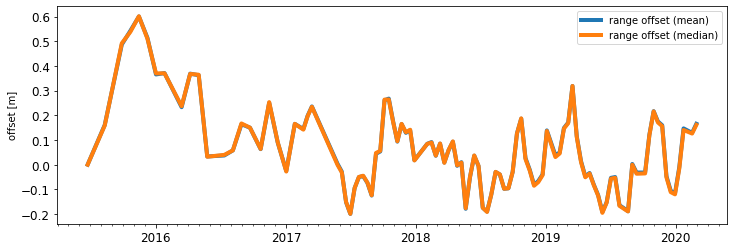

In [9]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(off['time'], off['range_offset_mean'],   linewidth=4, color='C0', label='range offset (mean)')
ax.plot(off['time'], off['range_offset_median'], linewidth=4, color='C1', label='range offset (median)')
pp.auto_adjust_xaxis_date(ax, times, every_year=1, buffer_year=None)
ax.set_ylabel('offset [m]')
plt.legend()

# output
out_fig = os.path.join(mintpy_dir, 'TS_off_rg.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()

save figure to file /Users/yunjunz/data/archives/ChileSenAT149/mintpyOffset/TS_off_az.png


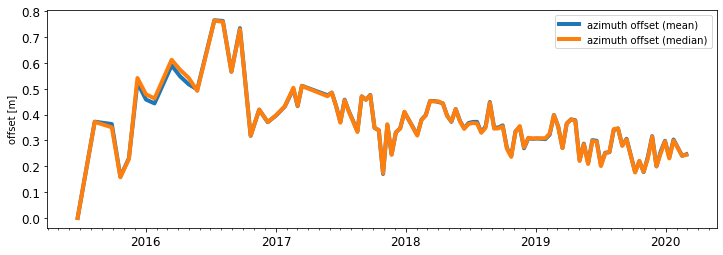

In [10]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(off['time'], off['azimuth_offset_mean'],   linewidth=4, color='C0', label='azimuth offset (mean)')
ax.plot(off['time'], off['azimuth_offset_median'], linewidth=4, color='C1', label='azimuth offset (median)')
pp.auto_adjust_xaxis_date(ax, times, every_year=1, buffer_year=None)
ax.set_ylabel('offset [m]')
plt.legend()

# output
out_fig = os.path.join(mintpy_dir, 'TS_off_az.png')
print('save figure to file', out_fig)
plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()